# Chapter 10 - Regression Analysis

This notebook contains code accompanying Chapter 10 Regression Analysis in *Practical Discrete Mathematics* by Ryan T. White and Archana Tikayat Ray.

## Auto Dataset

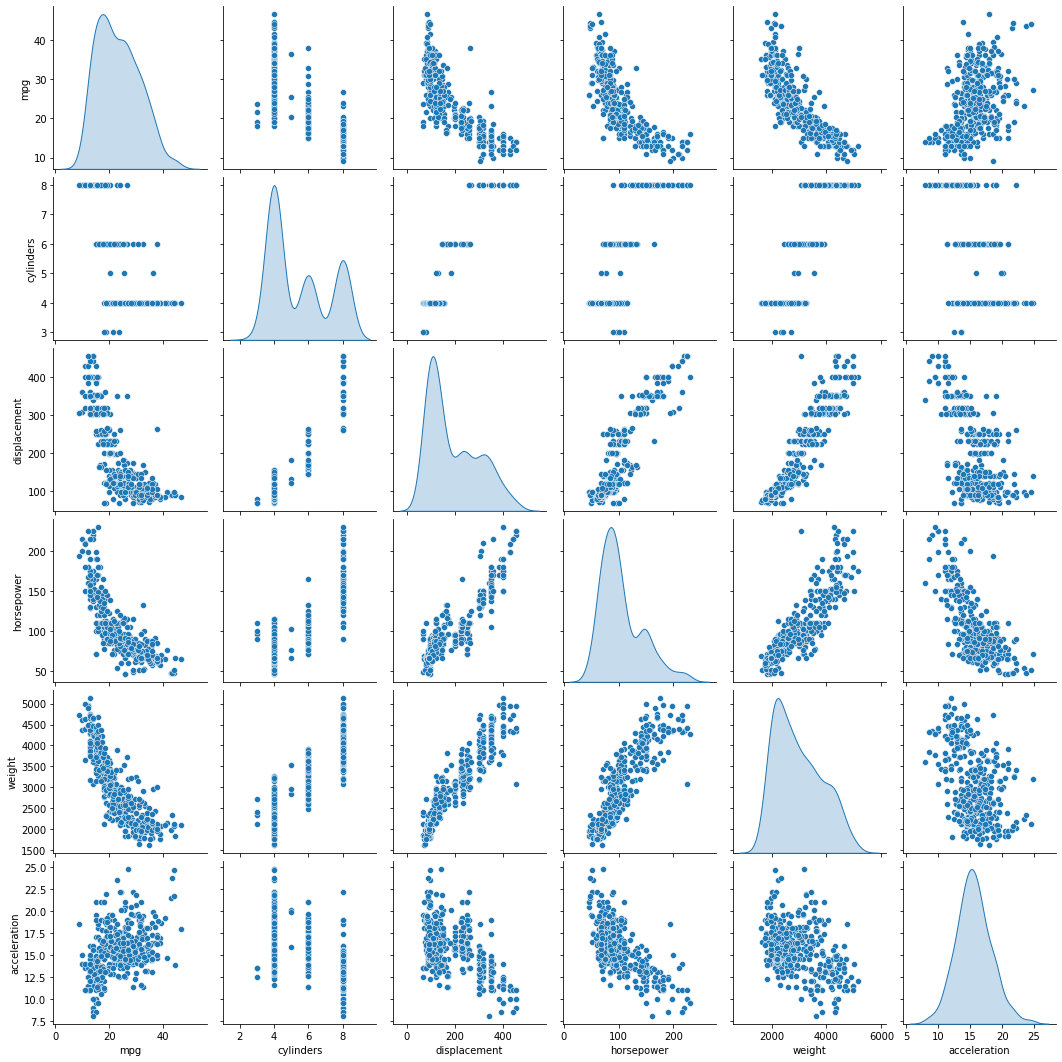

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Importing the csv file
df = pd.read_csv("auto_dataset.csv",index_col=0)

#Plotting the pairplot
sns.pairplot(df, diag_kind="kde")
plt.show()

## Least-squares lines with `NumPy`

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# find the shape of the auto dataset
df = pd.read_csv("auto_dataset.csv")
df.shape

(392, 7)

In [ ]:
X = df["weight"]
Y = df["horsepower"]

X_b = np.c_[np.ones((392,1)),X] #here we are adding X_o = 1 to all the feature values
beta_values = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

print(beta_values)

[-12.1834847    0.03917702]


In [ ]:
X_new = np.array([[2500],[2045]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(beta_values)

print(f"Weight of car = 2500; predicted horsepower is {y_predict[0]:.3}; actual horsepower is 88")
print(f"Weight of car = 2045; predicted horsepower is {y_predict[1]:.3}; actual horsepower is 68")

Weight of car = 2500; predicted horsepower is 85.8; actual horsepower is 88
Weight of car = 2045; predicted horsepower is 67.9; actual horsepower is 68


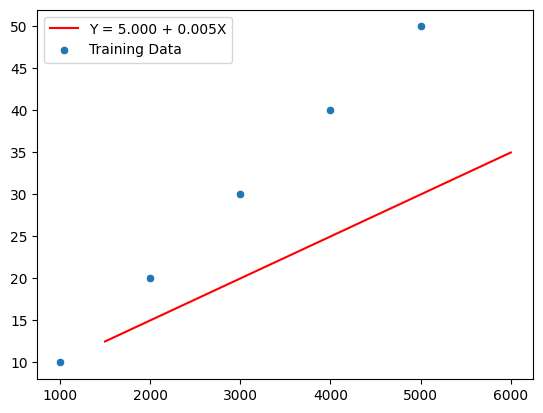

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example data (replace with your actual values)
X = np.array([1000, 2000, 3000, 4000, 5000])  # Training data
Y = np.array([10, 20, 30, 40, 50])  # Training target
beta_values = np.array([5, 0.005])  # Example coefficients [intercept, slope]

# Define the plot data
X_plot = np.array([[1500], [6000]])
X_plot_b = np.c_[np.ones((2, 1)), X_plot]
Y_plot = X_plot_b.dot(beta_values)

# Equation of the line
Equationline = "Y = {:.3f} + {:.3f}X".format(beta_values[0], beta_values[1])

# Plotting
plt.plot(X_plot, Y_plot, "r-", label=Equationline)
sns.scatterplot(x=X, y=Y, label="Training Data")
plt.legend()
plt.show()


Next, we show how to find the model with scikit-learn.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
df = pd.read_csv("auto_dataset.csv")

X = df["weight"]
Y = df["horsepower"]

X = X.values.reshape(-1,1)
Y = Y.values.reshape(-1,1)

reg.fit(X, Y)

print("The value obtained for beta_o is:", reg.intercept_)
print("The value obtained for beta_1 is:", reg.coef_[0])

The value obtained for beta_o is: [-12.1834847]
The value obtained for beta_1 is: [0.03917702]


In [ ]:
# predict the output from a new datapoint
X_new = np.array([[2500],[2045]])
print(reg.predict(X_new))

[[85.75906307]
 [67.93351937]]


## Least-squares curves with `NumPy` and `SciPy`

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#Importing the dataset as a pandas dataframe
df = pd.read_csv("auto_dataset.csv")

#Selecting the variables of interest
X = df["horsepower"]
y = df["mpg"]

#Converting the series to a column matrix
X_new = X.values.reshape(-1,1)
y_new = y.values.reshape(-1,1)

#Fitting y = beta0 + beta1x + beta2x^2
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_new)

reg = LinearRegression()
reg.fit(X_poly, y_new)

print("Y = {:.4f} X^2 {:.3f} X + {:.3f}".format(reg.coef_[0,1], reg.coef_[0,0], reg.intercept_[0]))

Y = 0.0012 X^2 -0.466 X + 56.900


Let's plot the model.

C:\Users\Ryan\anaconda3\envs\DL\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


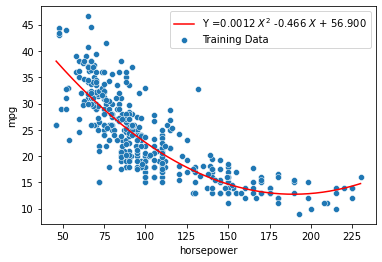

In [ ]:
start = df["horsepower"].values.min()
stop = df["horsepower"].values.max()

X_plot = np.linspace(start, stop, 1000)
Y_plot = reg.coef_[0,1] * X_plot * X_plot + reg.coef_[0,0] * X_plot + reg.intercept_[0]

Equationline = "Y ={:.4f} $X^2$ {:.3f} $X$ + {:.3f}".format(reg.coef_[0,1], reg.coef_[0,0], reg.intercept_[0])

sns.scatterplot(X,y, label = "Training Data")
plt.plot(X_plot, Y_plot, "r-", label = Equationline)
plt.legend()
plt.show()

### Least-squares surfaces with `NumPy` and `SciPy`

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

#Importing the csv file and choosing the X and Y variables
df = pd.read_csv("auto_dataset.csv")

Y = df["displacement"]
X = df[["horsepower","weight"]]

#Fitting the linear regression model
reg = LinearRegression()
reg.fit(X, Y)

# Printing the parameter values obtained after fitting the model
print("The value obtained for beta_o is: ", reg.intercept_)
print("The value obtained for beta_1 and beta_2 are: ",reg.coef_[0] , "and", reg.coef_[1] )

The value obtained for beta_o is:  -135.95073526530456
The value obtained for beta_1 and beta_2 are:  0.9757143655155813 and 0.07671670340152593


Let's plot the model.

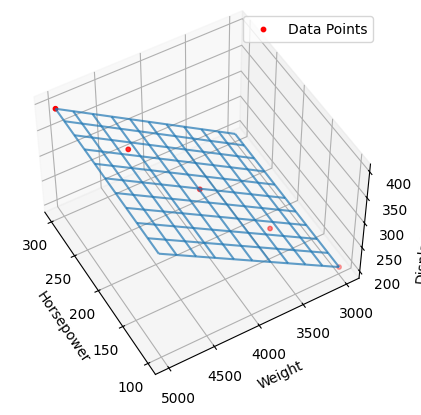

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Example dataset (replace with your actual data)
data = {
    "horsepower": [100, 150, 200, 250, 300],
    "weight": [3000, 3500, 4000, 4500, 5000],
    "displacement": [200, 250, 300, 350, 400],
}
df = pd.DataFrame(data)

# Define features (X) and target (Y)
X = df[["horsepower", "weight"]]
Y = df["displacement"]

# Fit linear regression model
reg = LinearRegression()
reg.fit(X, Y)

# Generate surface plot values
X1_min = df["horsepower"].values.min()
X1_max = df["horsepower"].values.max()
X1_values = np.linspace(X1_min, X1_max, 100)

X2_min = df["weight"].values.min()
X2_max = df["weight"].values.max()
X2_values = np.linspace(X2_min, X2_max, 100)

X1_plot, X2_plot = np.meshgrid(X1_values, X2_values)
Y_plot = reg.intercept_ + reg.coef_[0] * X1_plot + reg.coef_[1] * X2_plot

# Create 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["horsepower"], df["weight"], df["displacement"], color="red", s=10, label="Data Points")

surf = ax.plot_wireframe(X1_plot, X2_plot, Y_plot, rstride=10, cstride=10, alpha=0.7)
ax.view_init(50, 150)
ax.set_xlabel("Horsepower")
ax.set_ylabel("Weight")
ax.set_zlabel("Displacement")
plt.legend()
plt.show()


Q2 please predict the horse power based on the value of weight, acceleration and mpg. Thereare 3 X values and 1 Y value. Please train the model. What is the most suitable plot?

In [9]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset (replace 'auto_dataset.csv' with your file path if needed)
file_path = 'auto_dataset.csv'
auto_data = pd.read_csv(file_path)

# Prepare the data
features = ["weight", "acceleration", "mpg"]
target = "horsepower"
X = auto_data[features]
Y = auto_data[target]

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the model
reg = LinearRegression()
reg.fit(X_train, Y_train)

# Model evaluation
mse = mean_squared_error(Y_test, reg.predict(X_test))
r2 = r2_score(Y_test, reg.predict(X_test))
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Coefficients: {reg.coef_}")
print(f"Intercept: {reg.intercept_}")

# Generate values for surface plot
X1_values = np.linspace(X["weight"].min(), X["weight"].max(), 50)
X2_values = np.linspace(X["mpg"].min(), X["mpg"].max(), 50)
X1_plot, X2_plot = np.meshgrid(X1_values, X2_values)
X3_fixed = X["acceleration"].mean()  # Fix acceleration to its mean

# Predict horsepower for the surface
Y_plot = (
    reg.intercept_
    + reg.coef_[0] * X1_plot
    + reg.coef_[1] * X3_fixed
    + reg.coef_[2] * X2_plot
)

# Create interactive 3D plot with Plotly
fig = go.Figure()

# Add surface
fig.add_trace(go.Surface(z=Y_plot, x=X1_plot, y=X2_plot, colorscale="Viridis", opacity=0.8))

# Add scatter points for actual data
fig.add_trace(
    go.Scatter3d(
        x=X["weight"],
        y=X["mpg"],
        z=Y,
        mode='markers',
        marker=dict(size=5, color='red', opacity=0.7),
        name="Actual Data"
    )
)

# Update layout for better visualization
fig.update_layout(
    title="Interactive 3D Surface Plot: Predicting Horsepower",
    scene=dict(
        xaxis_title="Weight",
        yaxis_title="MPG",
        zaxis_title="Horsepower"
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# Show plot
fig.show()




Mean Squared Error: 184.93
R-squared: 0.88
Coefficients: [ 0.02757827 -5.4675519  -0.53056952]
Intercept: 119.75130562991727
